# NLTK with Lewis Grassic Gibbon First Editions

**Data Source:** [National Library of Scotland Data Foundry](https://data.nls.uk/data/digitised-collections/lewis-grassic-gibbon-first-editions/)

**Code Reference:** 
National Library of Scotland. Exploring Lewis Grassic Gibbon First Editions. National Library of Scotland, 2020. https://doi.org/10.34812/gq6w-6e91

**Date:** April 6, 2022

**Course:** Text Analysis with NLTK (Week 2, Class 3); Centre for Data, Culture & Society

***

**Corpus Name:** Lewis Grassic Gibbon First Editions

**Questions:**
1. What are the most common words in the corpus?
    * How many words are in the entire corpus?
        * Create a list of all the alphabetic tokens (words)
    * Calculate the frequency distribution (`FeqDist()`)
    

2. What are the most common words in one book from the corpus?
    * Identify which files in the corpus are for which book
        * Create a list of all the alphabetic tokens (words)
    * Calculate the frequency distribution for individual files
    

3. How does the word choice of the author change from one book to another?
    * How many words are in each book (each file in the corpus)?
    * How many *unique* words are in each book?
        * Normalize (standardize) the words by casefolding
    * Lexical diversity = count of unique words / count of all words

***

## Table of Contents

I. [Preparation](#preparation)

II. [Normalization](#normalization)

III. [Analysis](#analysis)

***

<a id="preparation"></a>
## I. Preparation

In [1]:
# To load a CSV file with an inventory of the documents in the corpus
import pandas as pd

# To create data visualizations
import altair as alt
import matplotlib.pyplot as plt

# To perform text analysis
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
from nltk.corpus import PlaintextCorpusReader
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.draw.dispersion import dispersion_plot as displt

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data_directory = "nls-text-gibbon"
wordlists = PlaintextCorpusReader(data_directory, "\d.*", encoding="latin1")
corpus_tokens = wordlists.words()  # method for tokenization
print(corpus_tokens[:20])

['R', ',', '17U', '\\(', 'o', 'First', 'journey', 'National', 'Library', 'of', 'Scotland', 'â', '\x80\x98', 'B000054136', '*', 'TIMBUCTOO', 'NIGER', 'BY', 'THE', 'SAME']


To get a sense of the data we're working with, let's create a function that tells us how many tokens, sentences, and files are in our corpus!

In [5]:
def corpusStatistics(plaintext_corpus_read_lists):
    total_tokens = 0
    total_sents = 0
    total_files = 0
    for fileid in plaintext_corpus_read_lists.fileids():
        total_tokens += len(plaintext_corpus_read_lists.words(fileid))
        total_sents += len(plaintext_corpus_read_lists.sents(fileid))
        total_files += 1
    print("Total tokens in LGG corpus:", total_tokens)
    print("Total sentences in LGG corpus:", total_sents)
    print("Total files in LGG corpus:", total_files)

In [6]:
corpusStatistics(wordlists)

Total tokens in LGG corpus: 1506095
Total sentences in LGG corpus: 70821
Total files in LGG corpus: 16


In [8]:
print(wordlists.fileids())

['205174241.txt', '205174242.txt', '205174243.txt', '205174244.txt', '205174245.txt', '205174246.txt', '205174247.txt', '205174248.txt', '205174249.txt', '205174250.txt', '205174251.txt', '205174252.txt', '205174253.txt', '205174254.txt', '205174255.txt', '205202834.txt']


What are the names of the books in each of these plaintext (TXT) files?

In [10]:
# This is where the pandas library comes in - works with tabular data
df = pd.read_csv('nls-text-gibbon/gibbon-inventory.csv', header=None, names=['fileid', 'title'])
df

,fileid,title
0,205174241.txt,Niger - R.176.i
1,205174242.txt,Thirteenth disciple - Vts.137.d
2,205174243.txt,Three go back - Vts.152.f.22
3,205174244.txt,Calends of Cairo - Vts.153.c.16
4,205174245.txt,Lost trumpet - Vts.143.j.8
5,205174246.txt,Image and superscription - Vts.118.l.16
6,205174247.txt,Spartacus - Vts.6.k.19
7,205174248.txt,"Persian dawns, Egyptian nights - Vts.148.d.8"
8,205174249.txt,Scots quair - Cloud howe - NF.523.b.30
9,205174250.txt,Scots quair - Grey granite - NF.523.b.31


Let's create a **dictionary**, one of the Python data types, that associates each `fileid` with each `title`.  That way we can quickly determine from our text analysis with NLTK what book we are looking at, since NLTK uses the fileids (the names of the files in our data directory, a.k.a. folder).

In [12]:
# obtain a list of all file IDs
fileids = list(df["fileid"])
print("List of file IDs:\n", fileids)
print()

# obtain a list of all titles
titles = list(df["title"])
print("List of titles:\n", titles)
print()

# create a dictionary where the keys are file IDs and the values are titles
lgg_dict = dict(zip(fileids, titles))
print("Dictionary of file IDs and titles:\n", lgg_dict)

List of file IDs:
 ['205174241.txt', '205174242.txt', '205174243.txt', '205174244.txt', '205174245.txt', '205174246.txt', '205174247.txt', '205174248.txt', '205174249.txt', '205174250.txt', '205174251.txt', '205174252.txt', '205174253.txt', '205174254.txt', '205174255.txt', '205202834.txt']

List of titles:
 ['Niger - R.176.i', 'Thirteenth disciple - Vts.137.d', 'Three go back - Vts.152.f.22', 'Calends of Cairo - Vts.153.c.16', 'Lost trumpet - Vts.143.j.8', 'Image and superscription - Vts.118.l.16', 'Spartacus - Vts.6.k.19 ', 'Persian dawns, Egyptian nights - Vts.148.d.8', 'Scots quair - Cloud howe - NF.523.b.30', 'Scots quair - Grey granite - NF.523.b.31', 'Scots quair - Sunset song - NF.523.b.29', 'Hanno, or, The future of exploration - S.114.j.21', 'Nine against the unknown - S.72.d.10', 'Conquest of the Maya - S.60.c', 'Gay hunter - Vts.215.j.26', 'Stained radiance - T.204.f']

Dictionary of file IDs and titles:
 {'205174241.txt': 'Niger - R.176.i', '205174242.txt': 'Thirteenth dis

In [13]:
# Now we can say...
a_file_id = fileids[10]
lgg_dict[a_file_id]

'Scots quair - Sunset song - NF.523.b.29'

In [14]:
# ...or simply...
lgg_dict['205174251.txt']

'Scots quair - Sunset song - NF.523.b.29'

<a id="normalization"></a>
## II. Normalization

Let's create lists of all the words (alphabetic tokens) and sentences in the LGG corpus.

In [15]:
def getWordsSents(plaintext_corpus_read_lists):
    all_words = []
    all_sents = []
    for fileid in plaintext_corpus_read_lists.fileids():
        
        file_words = plaintext_corpus_read_lists.words(fileid)
        all_words += [str(word) for word in file_words if word.isalpha()]
        
        file_sents = sent_tokenize(plaintext_corpus_read_lists.raw(fileid))
        all_sents += [str(sent) for sent in file_sents]
        
    return all_words, all_sents

In [16]:
lgg_words, lgg_sents = getWordsSents(wordlists)
print(lgg_words[:20])

['R', 'o', 'First', 'journey', 'National', 'Library', 'of', 'Scotland', 'â', 'TIMBUCTOO', 'NIGER', 'BY', 'THE', 'SAME', 'AUTHOR', 'Novels', 'forming', 'the', 'trilogy', 'A']


Casefold to normalize so capitalized and lowercased versions of words are considered the same word:

In [19]:
lgg_words_lower = [word.lower() for word in lgg_words]
print(lgg_words_lower[:20])

['r', 'o', 'first', 'journey', 'national', 'library', 'of', 'scotland', 'â', 'timbuctoo', 'niger', 'by', 'the', 'same', 'author', 'novels', 'forming', 'the', 'trilogy', 'a']


Exclude stopwords:

In [20]:
to_exclude = set(stopwords.words('english'))
filtered_lower = [w for w in lgg_words_lower if (len(w) > 2 and not w in to_exclude)]
print(len(lgg_words_lower))
print(len(filtered_lower))

1260760
621940


<a id="analysis"></a>
## III. Analysis

Calculate the frequency distribution, or the count of occurrences of each word across the entire corpus:

In [21]:
fdist_filtered_lower = FreqDist(filtered_lower)
print("Total words after filtering:", fdist_filtered_lower.N())
print("50 most common words after filtering:", fdist_filtered_lower.most_common(50))

Total words after filtering: 621940
50 most common words after filtering: [('would', 3240), ('said', 3142), ('came', 2885), ('like', 2861), ('one', 2599), ('great', 2217), ('back', 2098), ('little', 2085), ('went', 1903), ('looked', 1903), ('long', 1874), ('eyes', 1739), ('night', 1730), ('still', 1647), ('time', 1615), ('face', 1581), ('old', 1564), ('though', 1558), ('man', 1498), ('saw', 1493), ('come', 1481), ('well', 1472), ('two', 1428), ('day', 1423), ('could', 1413), ('men', 1385), ('heâ', 1374), ('chris', 1364), ('never', 1363), ('thought', 1339), ('last', 1265), ('heard', 1241), ('head', 1228), ('made', 1223), ('found', 1161), ('years', 1148), ('mungo', 1145), ('first', 1141), ('away', 1125), ('even', 1112), ('hand', 1088), ('life', 1075), ('far', 1071), ('youâ', 1049), ('upon', 1042), ('new', 1026), ('god', 1021), ('stood', 1015), ('three', 1003), ('see', 994)]


*Note the â - we'll talk about how to clean up digitization errors like this that are common to the OCR (optical character recognition) process next class!*

In [24]:
import re # Regular Expressions (RegEx)
o_exclude = set(stopwords.words('english'))
for w in lgg_words_lower:
    if re.match('â', w):
        w = w.replace('â','')
    if (len(w) > 2 and not w in to_exclude):
        filtered_lower += [w]

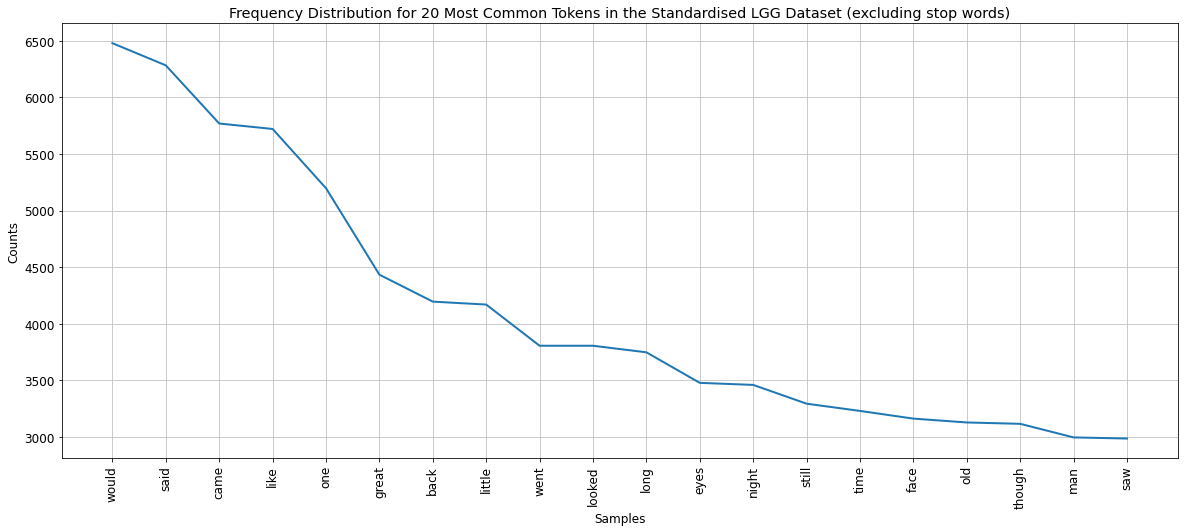

<AxesSubplot:title={'center':'Frequency Distribution for 20 Most Common Tokens in the Standardised LGG Dataset (excluding stop words)'}, xlabel='Samples', ylabel='Counts'>

In [25]:
fdist_filtered_lower = FreqDist(filtered_lower)
plt.figure(figsize = (20, 8))
plt.rc('font', size=12)
number_of_tokens = 20 # Try increasing or decreasing this number to view more or fewer tokens in the visualization
fdist_filtered_lower.plot(number_of_tokens, title='Frequency Distribution for ' + str(number_of_tokens) + ' Most Common Tokens in the Standardised LGG Dataset (excluding stop words)')
plt.show()

In [26]:
# INPUT: wordlists and the fileid of the wordlist to be tokenised
# OUTPUT: a list of word tokens (in String format) for the inputted fileid
def getWords(plaintext_corpus_read_lists, fileid):
    file_words = plaintext_corpus_read_lists.words(fileid)
    str_words = [str(word) for word in file_words]    
    return str_words

In [27]:
words_by_file = []
for file in fileids:
    words_by_file += [getWords(wordlists, file)]

In [29]:
# INPUT: a list of words in String format
# OUTPUT: the number of unique words divided by
#         the total words in the inputted list
def lexicalDiversity(str_words_list):
    return len(set(str_words_list))/len(str_words_list)

Add to the inventory...

In [30]:
lexdiv_by_file = []
for words in words_by_file:
    lexdiv_by_file += [lexicalDiversity(words)]

df['lexicaldiversity'] = lexdiv_by_file
df_lexdiv = df.sort_values(by=['lexicaldiversity', 'title'], inplace=False, ascending=True)
df_lexdiv

,fileid,title,lexicaldiversity
10,205174251.txt,Scots quair - Sunset song - NF.523.b.29,0.065385
8,205174249.txt,Scots quair - Cloud howe - NF.523.b.30,0.070213
6,205174247.txt,Spartacus - Vts.6.k.19,0.087958
9,205174250.txt,Scots quair - Grey granite - NF.523.b.31,0.089606
5,205174246.txt,Image and superscription - Vts.118.l.16,0.099516
2,205174243.txt,Three go back - Vts.152.f.22,0.099821
14,205174255.txt,Gay hunter - Vts.215.j.26,0.105574
12,205174253.txt,Nine against the unknown - S.72.d.10,0.110520
4,205174245.txt,Lost trumpet - Vts.143.j.8,0.111272
3,205174244.txt,Calends of Cairo - Vts.153.c.16,0.111771


For the entire corpus:

In [31]:
lexicalDiversity(lgg_words_lower)

0.034381642818617345

The table isn't bad but charts can make it easier to compare calculations more quickly, so let's visualize the lexical diversity scores!

In [36]:
sorted_titles = list(df_lexdiv['title'])
sorted_lexdiv = list(df_lexdiv['lexicaldiversity'])
source = pd.DataFrame({
    'Title': sorted_titles,
    'Lexdiv': sorted_lexdiv
})

alt.Chart(source, title="Lexical Diversity of Gibbon's Works").mark_bar(size=30).encode(
    alt.X('Title', axis=alt.Axis(title='Lewis Grassic Gibbon Work'), type='nominal', sort=None),  # If sort unspecified, chart will sort x-axis values alphabetically
    alt.Y('Lexdiv', axis=alt.Axis(title='Lexical Diversity')),
    alt.Order(
      # Sort the segments of the bars by this field
      'Lexdiv',
      sort='ascending'
    )
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).properties(
    width=500
)

#     alt.Y('Lexdiv', axis=alt.Axis(format='%', title='Lexical Diversity')),

alt.Chart(...)

Could we sort these chronologically?

We can add information available from the [digital.nls.uk](https://data.nls.uk/wp-content/uploads/2020/10/digital.nls.uk) website about the publication dates to our inventory...

In [33]:
published = [1932, 1933, 1933, 1934, 1933, 1932, 1934, 1934, 1934, 1931, 1932, 1934, 1932, 1930, 1931, 1928]
df_lexdiv['published'] = published
df_pub = df_lexdiv.sort_values(by=['published', 'title'], inplace=False, ascending=True)
df_pub.head()

,fileid,title,lexicaldiversity,published
11,205174252.txt,"Hanno, or, The future of exploration - S.114.j.21",0.213570,1928
7,205174248.txt,"Persian dawns, Egyptian nights - Vts.148.d.8",0.124095,1930
3,205174244.txt,Calends of Cairo - Vts.153.c.16,0.111771,1931
1,205174242.txt,Thirteenth disciple - Vts.137.d,0.128709,1931
0,205174241.txt,Niger - R.176.i,0.116924,1932


Then we can recreate the bar chart with the bars (books) sorted by year of publication:

In [35]:
sorted_titles = list(df_pub['title'])
sorted_lexdiv = list(df_pub['lexicaldiversity'])
sorted_published = list(df_pub['published'])
source = pd.DataFrame({
    'Title': sorted_titles,
    'Lexdiv': sorted_lexdiv,
    'Published': sorted_published
})

alt.Chart(source, title="Lexical Diversity of Gibbon's Works").mark_bar(size=30).encode(
    alt.X('Title', axis=alt.Axis(title='Title of Lewis Grassic Gibbon Work'), type='nominal', sort=None),  # If sort unspecified, chart will sort x-axis values alphabetically
    alt.Y('Lexdiv', axis=alt.Axis(title='Lexical Diversity')),
    alt.Order(
      # Sort the segments of the bars by this field
      'Lexdiv',
      sort='descending'
    ),
    color=alt.Color('Published:O', legend = alt.Legend(title='Date Published')),
    tooltip='Title:N'
).configure_axis(
    grid=False,
    labelFontSize=12,
    titleFontSize=12,
    labelAngle=-45
).configure_title(
    fontSize=14,
).configure_view(
    strokeWidth=0
).properties(
    width=500
)

alt.Chart(...)

To get the lexical diversity per year...

In [37]:
# dictionary associating works with year they were published
pub_yr = {1928: [], 1930: [], 1931: [], 1932: [], 1933: [], 1934: []}
for index,row in df_pub.iterrows():
    pub_yr[row[3]] += [row[0]]
print(pub_yr)

{1928: ['205174252.txt'], 1930: ['205174248.txt'], 1931: ['205174244.txt', '205174242.txt'], 1932: ['205174241.txt', '205174251.txt', '205202834.txt', '205174243.txt'], 1933: ['205174246.txt', '205174249.txt', '205174247.txt'], 1934: ['205174254.txt', '205174255.txt', '205174245.txt', '205174253.txt', '205174250.txt']}


In [38]:
lexdiv_by_year = []
for key,value in pub_yr.items():
    lexdiv_by_file = []
    for fileid in value:
        file_words = wordlists.words(fileid)
        str_words = [str(w.lower()) for w in file_words if w.isalpha()]
        lexdiv_by_file += [lexicalDiversity(str_words)]
    lexdiv_by_year += [sum(lexdiv_by_file)/len(lexdiv_by_file)]
print(lexdiv_by_year)

[0.23601900972590628, 0.13157772585910785, 0.1292755998169271, 0.1069772992539837, 0.09077813517219867, 0.11185025739806571]


In [39]:
pub_years = [1928, 1930, 1931, 1932, 1933, 1934]
pub_lex = dict(zip(pub_years, lexdiv_by_year))
pub_lex

{1928: 0.23601900972590628,
 1930: 0.13157772585910785,
 1931: 0.1292755998169271,
 1932: 0.1069772992539837,
 1933: 0.09077813517219867,
 1934: 0.11185025739806571}

Now we can visualize the average lexical diversity score for each year Gibbon published in:

In [40]:


source = pd.DataFrame({
    'Year': pub_years,
    'Average Lexical Diversity': lexdiv_by_year
})

alt.Chart(source, title="Average Yearly Lexical Diversity of Gibbon First Editions").mark_bar(size=60).encode(
    alt.X('Year', axis=alt.Axis(title='Year of Publication'), type='ordinal'),
    alt.Y('Average Lexical Diversity', axis=alt.Axis(title='Average Lexical Diversity'))
).configure_axis(
    grid=False,
    labelFontSize=12,
    titleFontSize=12,
    labelAngle=0
).configure_title(
    fontSize=14,
).configure_view(
    strokeWidth=0
).properties(
    width=365
)

alt.Chart(...)

So Gibbon's lexical diversity does decrease over time, excepting a small increase in the last year he published, 1934!